<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Predict_fuel_efficiency_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 

In [ ]:
url_dataset = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
Data = pd.read_csv(url_dataset, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)  

In [ ]:
Data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
Data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
Data[Data["Horsepower"].isna()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [ ]:
data = Data.drop(Data[Data["Horsepower"].isna()].index)

In [ ]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
pd.get_dummies(data, columns=["Origin"])

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [ ]:
data["Origin"].unique()

array([1, 3, 2])

In [ ]:
data["Origin"] = data["Origin"].map({1:"USA", 2:"India",3:"France"})

In [ ]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,India
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [ ]:
data = pd.get_dummies(data, columns=["Origin"])

In [ ]:
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_France,Origin_India,Origin_USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


#Split the data into train and test data, with data manipulation

In [ ]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_dataset.index)

In [ ]:
test_data.shape, train_dataset.shape

((78, 10), (314, 10))

In [ ]:
train_features = train_dataset.copy()
test_features = test_data.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
train_features.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_France,Origin_India,Origin_USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,1,0,0


# use train test splti to split the data 

In [42]:
from sklearn.model_selection import train_test_split
train_data = data.drop("MPG", axis=1)
test_data = data["MPG"] 

In [55]:
train_features, test_features, train_labels, test_labels = train_test_split(train_data, test_data, train_size=0.8)

In [56]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((313, 9), (313,), (79, 9), (79,))

In [57]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [58]:
data_transform_model = make_column_transformer(
    (MinMaxScaler() , ["Cylinders",	"Displacement",	"Horsepower",	"Weight",	"Acceleration",	"Model Year"])
) 

In [59]:
data_transform_model.fit(train_features)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Cylinders', 'Displacement', 'Horsepower',
                                  'Weight', 'Acceleration', 'Model Year'])])

In [60]:
norm_training_fea = data_transform_model.transform(train_features)
norm_test_fea = data_transform_model.transform(test_features)

In [71]:
norm_horsepower = norm_training_fea[:,2]

In [77]:
tf.random.set_seed(41)
hp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [121]:
hp_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = "mean_absolute_error"
)

In [133]:
hp_model.fit(
    norm_training_fea,
    train_labels,
    epochs = 100,
    verbose = 0
)

In [134]:
hp_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            multiple                  700       
                                                                 
 dense_12 (Dense)            multiple                  1010      
                                                                 
 dense_13 (Dense)            multiple                  11        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [96]:
norm_training_fea.shape, train_labels.shape

((313, 6), (313,))

In [123]:
type(history)

keras.callbacks.History

In [125]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
95,2.553663,95
96,2.580869,96
97,2.620620,97
98,2.550487,98
99,2.537028,99


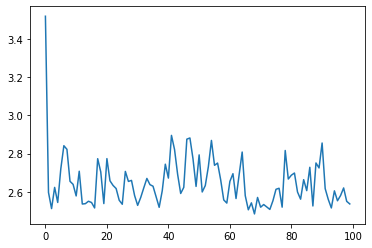

In [127]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')

In [136]:
hp_model.evaluate(norm_test_fea, test_labels) 

3/3 [==============================] - 0s 5ms/step - loss: 2.9618


2.961784601211548

In [131]:
norm_test_fea

array([[0.6       , 0.40568475, 0.26630435, 0.4681032 , 0.47619048,
        0.41666667],
       [0.2       , 0.22739018, 0.25      , 0.27558832, 0.38690476,
        1.        ],
       [0.2       , 0.13953488, 0.2173913 , 0.1738021 , 0.50595238,
        0.16666667],
       [0.2       , 0.11627907, 0.26630435, 0.21519705, 0.41666667,
        0.        ],
       [1.        , 0.64599483, 0.56521739, 0.73064928, 0.29761905,
        0.5       ],
       [0.4       , 0.1369509 , 0.11413043, 0.3790757 , 0.70833333,
        0.83333333],
       [0.2       , 0.09560724, 0.0923913 , 0.14516586, 0.39880952,
        1.        ],
       [1.        , 0.85788114, 0.7826087 , 0.79642756, 0.26785714,
        0.16666667],
       [0.2       , 0.05943152, 0.11956522, 0.10547207, 0.47619048,
        0.91666667],
       [0.2       , 0.10335917, 0.25543478, 0.22058407, 0.44642857,
        0.33333333],
       [0.2       , 0.08527132, 0.20108696, 0.16699745, 0.43452381,
        0.5       ],
       [0.2       , 0

In [141]:
hp_model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f3bc43e4590>>

In [142]:
x = tf.linspace(0.0, 250.0, 251)
y = hp_model.predict(norm_test_fea)

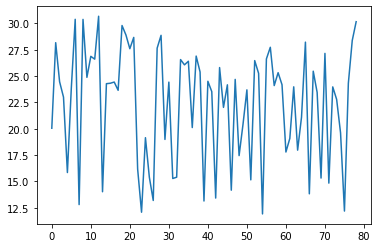

In [144]:
plt.plot(y)

In [147]:
test_labels.describe()

count    79.000000
mean     23.354430
std       8.170127
min      11.000000
25%      16.100000
50%      23.500000
75%      27.000000
max      46.600000
Name: MPG, dtype: float64

In [156]:
a = test_labels.values
(a-y).mean()

1.009397229061851